In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df =pd.read_csv('/content/Mall_Customers.csv')

In [21]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
#seperate the input variable
x=  df.iloc[:,[3,4]]
x.shape

(200, 2)

In [28]:
x.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

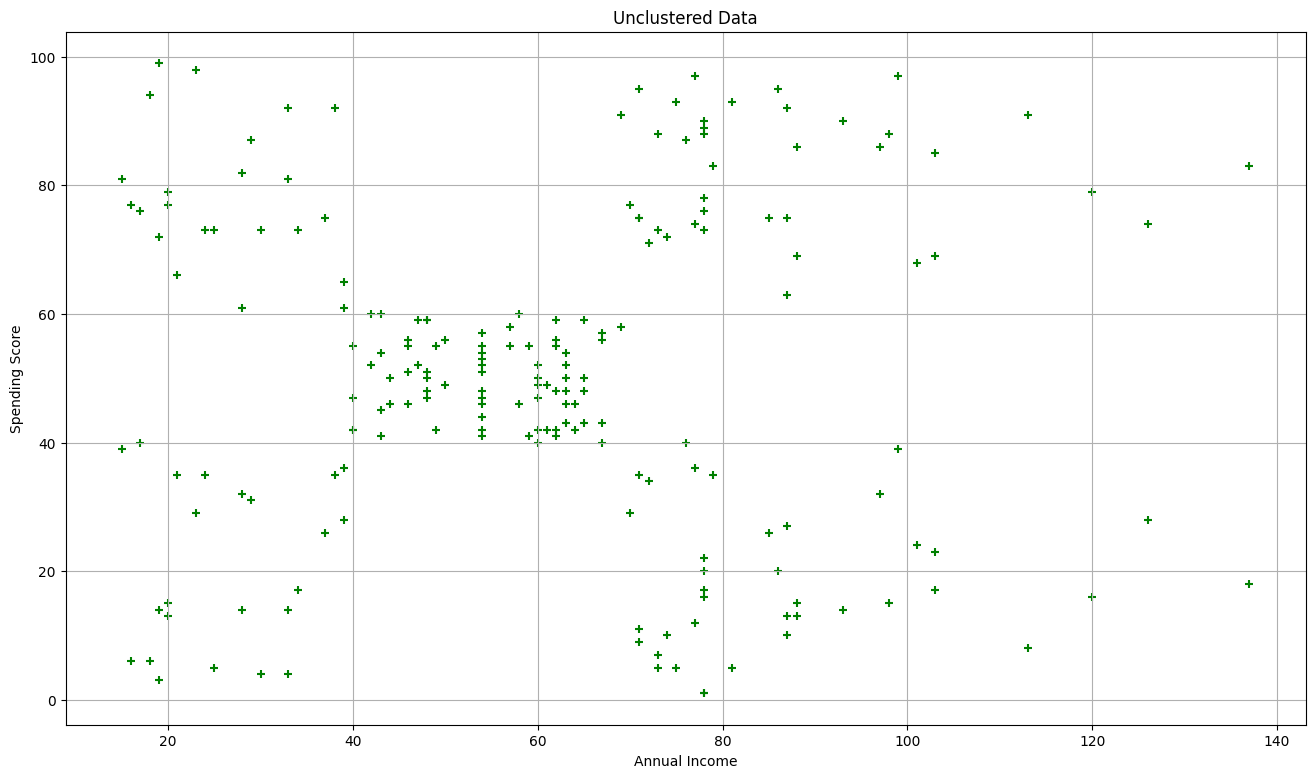

In [32]:
#EXPLORING THE DATA
plt.figure(figsize=(16,9))
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = 'green',marker = '+')

In [33]:
#to decide how many clusters we need to find
 #we use elbow point method
 # this method will find the sse for multiple k values
#sse- sum squeard error
# it sums the error or distance of the point from the centroid
# The value of K and SSE in inversely proportional
# the value of K is the elbow point where the rate of change between SSE and K changes.



In [35]:
from sklearn.cluster import KMeans

In [51]:
km = KMeans(random_state = 0,n_clusters = 3, n_init = 'auto')


In [52]:
y = km.fit_predict(x)

In [53]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [54]:
#to find the SSE
km.inertia_

106348.37306211122

In [68]:
sse = []

for k in range(1,16):
      km = KMeans(random_state = 0,n_clusters = k, n_init = 'auto')
      km.fit_predict(x)
      sse.append(km.inertia_)


In [69]:
sse

[269981.28,
 186362.95600651755,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 37265.86520484346,
 31648.556137745232,
 31858.344372294378,
 26629.993500201348,
 25612.530534984333,
 19027.227817593026,
 16988.41244832862,
 15491.015803306973,
 14265.104439670607,
 12953.067996289426]

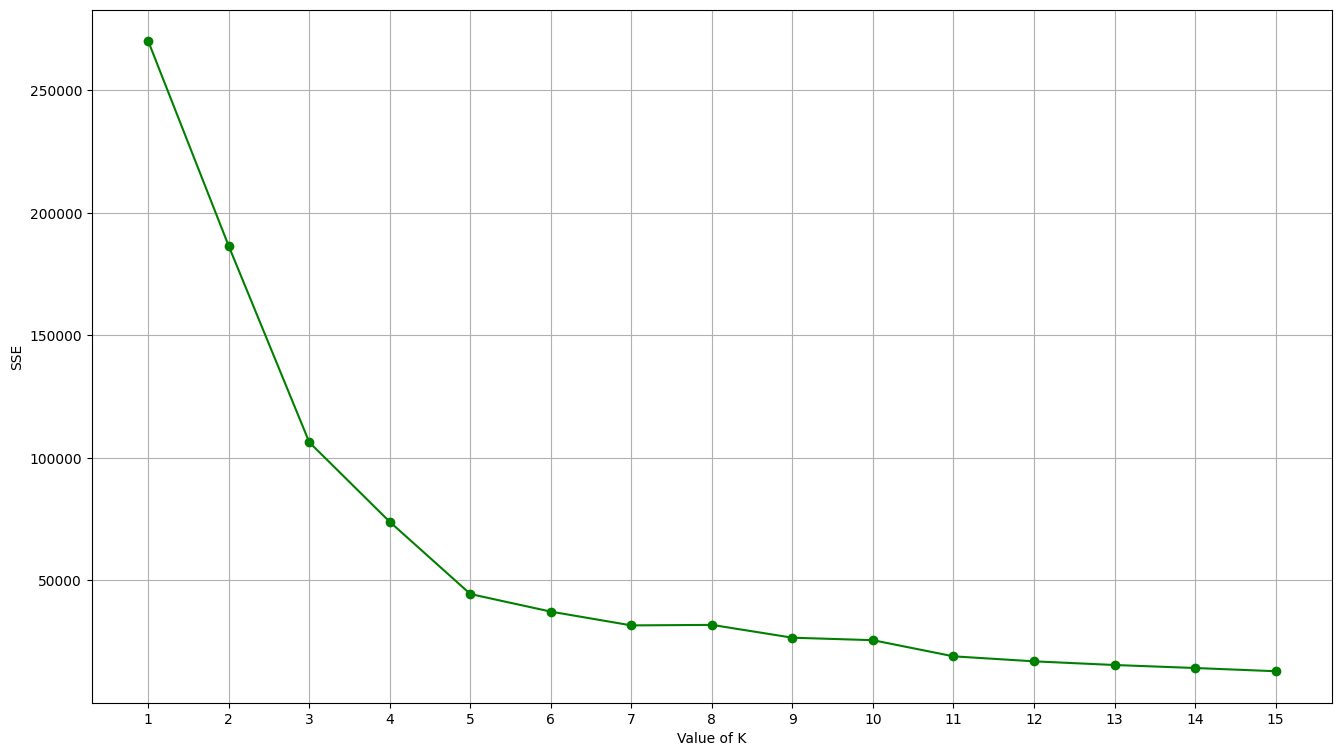

In [74]:
plt.figure(figsize=(16,9))
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,color = 'green',marker='o')

In [75]:
#to create the clusters
km = KMeans(n_clusters=5,random_state = 0)

In [76]:
y = km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [79]:
cents = km.cluster_centers_

In [80]:
cents

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

<ipython-input-83-99a818d4c5fc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


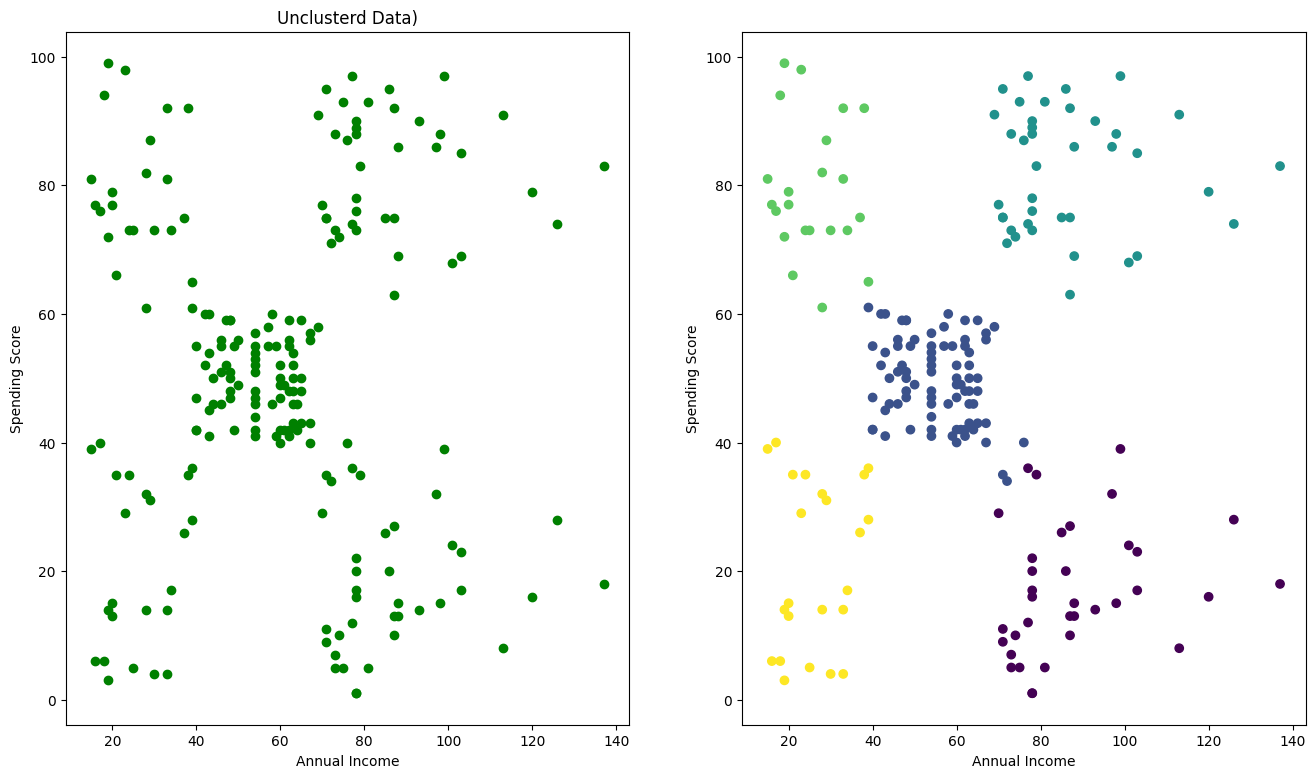

In [83]:
plt.figure(figsize=(16,9))
plt.grid()
plt.subplot(1,2,1)
plt.title('Unclusterd Data)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],color = 'green',marker='o')
plt.subplot(1,2,2)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],marker='o',c =y)